# Introduction to Exploratory Data Analysis

> "Exploratory data analysis can never be the whole story, but nothing else can serve as the foundation stone." -- John Tukey

In this chapter we will explore the basics of graphical exploratory data analysis techniques. As they a picture can speak thousand words. Let's jump right into it.

## Plotting a histogram

One of the basic methods of graphical exploratory data analysis is to plot histogram on the data we are trying to analyze. This gives us a quick feel of the data. For our initial practice, we will use a classic dataset collected by botanist Edward Anderson and made famous by Ronald Fisher, one of the most prolific statisticians in the history. Anderson carefully measured anatomical properties of the samples of three different species of iris, *Iris Sentosa*, *Iris versicolor* and *Iris virginica*. This full dataset is available as part of `Scikit-Learn`. Let's get the data. 

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
print(F"Target names: {iris.target_names}")
print(F"Feature names: {iris.feature_names}")
print(F"Dataset size: {iris.data.shape}")

Target names: ['setosa' 'versicolor' 'virginica']
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Dataset size: (150, 4)


We will plot distribution of the versicolor petal length as a histogram. Let's first get that into a variable.

In [3]:
import numpy as np
petal_length = iris.data[:, 2]
versicolor_petal_length_indices = np.where(iris.target == 1)
versicolor_petal_length = petal_length[versicolor_petal_length_indices]

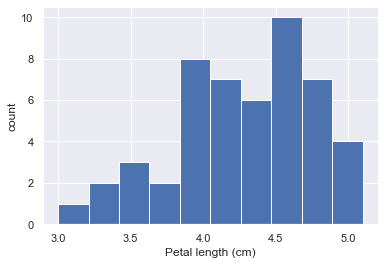

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt  
sns.set()

_ = plt.hist(versicolor_petal_length)
_ = plt.xlabel("Petal length (cm)")
_ = plt.ylabel("count")
_ = plt.show()

The histogram has 10 bins by default, and the count tells us how many of the values from the dataset lies in that bin. For instance, for length 5.0 cm, we have count of 4. Let's change the number of bins.

***Square root rule of choosing bins***: The "square root rule" is the commonly used rule of thumb for choosing the number of bins: choose the number of bins to be square root of the number of samples.  

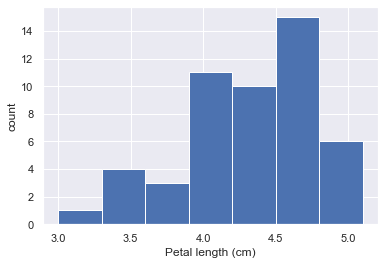

In [5]:
n_data = len(versicolor_petal_length)
n_bins = int(np.sqrt(n_data))

_ = plt.hist(versicolor_petal_length, bins=n_bins)
_ = plt.xlabel("Petal length (cm)")
_ = plt.ylabel("count")
_ = plt.show()

Let's plot this in varying number of bins.


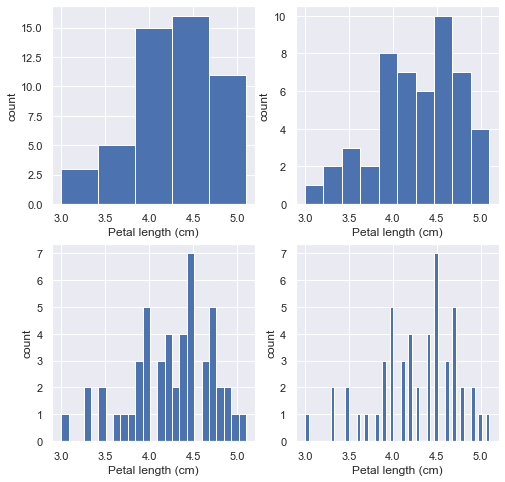

In [9]:
def plot_histogram(n_bins):
    _ = plt.hist(versicolor_petal_length, bins=n_bins)
    _ = plt.xlabel("Petal length (cm)")
    _ = plt.ylabel("count")
    
plt.figure(figsize=(8, 8))
plt.subplot(221)
plot_histogram(5)
plt.subplot(222)
plot_histogram(10)
plt.subplot(223)
plot_histogram(25)
plt.subplot(224)
plot_histogram(50)

## Plotting all of the data: Bee Swarm plots.

The problem with histogram plots is it can look entirely different when the number of bins change.